In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
data=pd.read_csv("D:\working folder\data Sciense\Repositories\Projects\miniproject_1\concrete_test.csv",skiprows=[0], header=[0])
df=data.copy()

In [3]:
df.head()

Cement   Slag  FlyAsh   Water  Superplasticizer  CoarseAgg  FineAgg  Age  \
0  236.00    0.0    0.00  193.00              0.00     968.00    885.0    7   
1  288.00  121.0    0.00  177.00              7.00     908.00    829.0   28   
2  290.35    0.0   96.18  168.08              9.41     961.18    865.0   14   
3  302.00    0.0    0.00  203.00              0.00     974.00    817.0   28   
4  262.00  111.0   86.00  195.00              5.00     895.00    733.0   28   

   compressivestrn  
0         9.990507  
1        42.133878  
2        34.673748  
3        21.752968  
4        33.715376

In [4]:
df.describe()


Cement        Slag      FlyAsh       Water  Superplasticizer  \
count  330.000000  330.000000  330.000000  330.000000        330.000000   
mean   286.251848   76.005394   50.132121  181.081091          5.903506   
std    106.319757   87.860810   61.971402   20.395209          6.012852   
min    102.000000    0.000000    0.000000  121.750000          0.000000   
25%    198.600000    0.000000    0.000000  164.900000          0.000000   
50%    277.000000   25.000000    0.000000  185.700000          5.775000   
75%    362.600000  140.725000  113.000000  192.000000         10.000000   
max    540.000000  359.400000  200.100000  236.700000         32.200000   

         CoarseAgg     FineAgg         Age  compressivestrn  
count   330.000000  330.000000  330.000000       330.000000  
mean    976.067273  773.462303   43.893939        35.031960  
std      76.858272   76.815195   65.211027        16.898006  
min     801.000000  594.000000    1.000000         4.565021  
25%     932.000000  733.250000    7.000000        22.369876  
50%     971.500000  780.000000   28.000000        33.798114  
75%    1036.000000  819.250000   56.000000        44.265221  
max    1145.000000  992.600000  365.000000        79.296635

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            330 non-null    float64
 1   Slag              330 non-null    float64
 2   FlyAsh            330 non-null    float64
 3   Water             330 non-null    float64
 4   Superplasticizer  330 non-null    float64
 5   CoarseAgg         330 non-null    float64
 6   FineAgg           330 non-null    float64
 7   Age               330 non-null    int64  
 8   compressivestrn   330 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 23.3 KB


In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [7]:
df['Total Cement']=df['Cement']+df['FlyAsh']+df['Slag']
df['Addtives']=df['FlyAsh']+df['Slag']
df['Addratio']=df['Addtives']*100/df['Cement']
df['Agg']=df['CoarseAgg']+df['FineAgg']
df['cemagg']=df['Total Cement']+df['Agg']

if the compressiuve strength would be improved having addetives

In [8]:
dfadd=df[df['Addtives']>0]
dfaddzero=df[df['Addtives']==0]


In [9]:
df['compressivestrn'].mean()

35.03195977411515

In [10]:
dfadd['compressivestrn'].mean()

36.03306858759055

In [11]:
dfaddzero['compressivestrn'].mean()

31.686148739605265

In [12]:
df[df.Age>=28]['compressivestrn'].mean()

41.77038878086124

In [13]:
dfadd[dfadd.Age>=28]['compressivestrn'].mean()

42.94082854567901

In [14]:
dfaddzero[dfaddzero.Age>=28]['compressivestrn'].mean()

37.73610703829787

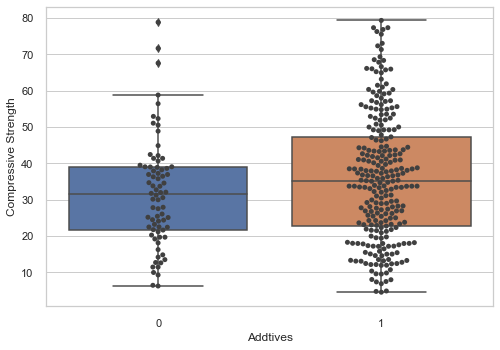

In [15]:
sns.set(style="whitegrid")
sns.boxplot(data=(dfaddzero['compressivestrn'],dfadd['compressivestrn']))
sns.swarmplot(data=(dfaddzero['compressivestrn'],dfadd['compressivestrn']), color=".25")
plt.xlabel('Addtives')
plt.ylabel('Compressive Strength')
plt.show()

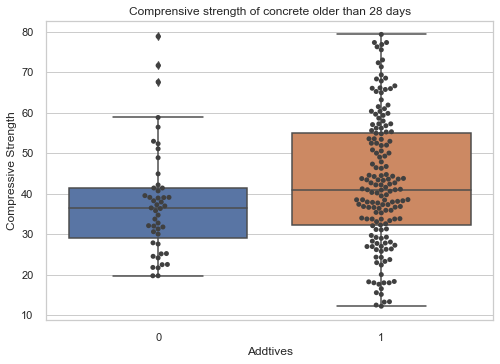

In [16]:
sns.set(style="whitegrid")
sns.boxplot(data=(dfaddzero[dfaddzero.Age>=28]['compressivestrn'],dfadd[dfadd.Age>=28]['compressivestrn']))
sns.swarmplot(data=(dfaddzero[dfaddzero.Age>=28]['compressivestrn'],dfadd[dfadd.Age>=28]['compressivestrn']), color=".25")
plt.xlabel('Addtives')
plt.ylabel('Compressive Strength')
plt.title('Comprensive strength of concrete older than 28 days')
plt.show()

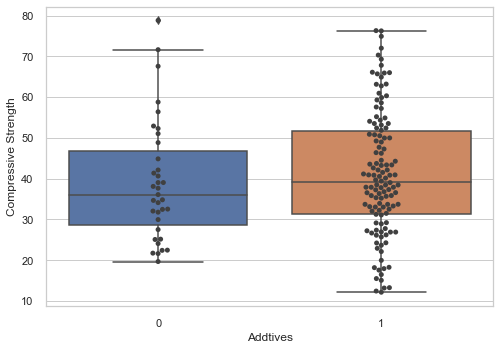

In [17]:
sns.set(style="whitegrid")
groupby_add=dfadd[dfadd.Age>=28].groupby('cemagg').mean()['compressivestrn']
groupby_zeroadd=dfaddzero[dfaddzero.Age>=28].groupby('cemagg').mean()['compressivestrn']
sns.boxplot(data=(groupby_zeroadd,groupby_add))
sns.swarmplot(data=(groupby_zeroadd,groupby_add), color=".25")
plt.xlabel('Addtives')
plt.ylabel('Compressive Strength')
plt.show()

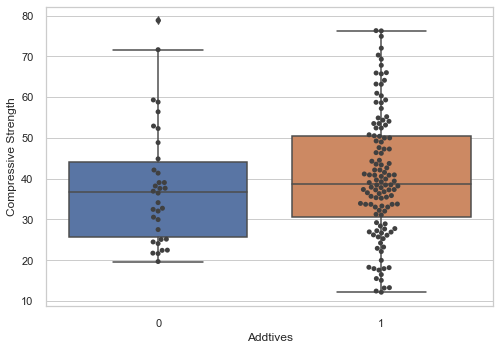

In [18]:
sns.set(style="whitegrid")
groupby_add=dfadd[dfadd.Age>=28].groupby('Total Cement').mean()['compressivestrn']
groupby_zeroadd=dfaddzero[dfaddzero.Age>=28].groupby('Total Cement').mean()['compressivestrn']
sns.boxplot(data=(groupby_zeroadd,groupby_add))
sns.swarmplot(data=(groupby_zeroadd,groupby_add), color=".25")
plt.xlabel('Addtives')
plt.ylabel('Compressive Strength')
plt.show()

In [19]:
dfadd[dfadd.Age==28].groupby('Addratio').mean()

Cement   Slag  FlyAsh  Water  Superplasticizer  CoarseAgg  \
Addratio                                                                
23.094170    446.0   24.0    79.0  162.0         11.183333      967.0   
23.568940    401.8   94.7     0.0  147.4         11.400000      946.8   
25.000000    304.0   76.0     0.0  228.0          0.000000      932.0   
25.010526    475.0  118.8     0.0  181.1          8.900000      852.1   
25.011765    425.0  106.3     0.0  153.5         16.500000      852.1   
...            ...    ...     ...    ...               ...        ...   
208.695652   151.8  178.1   138.7  167.5         18.300000      944.0   
208.732999   139.7  163.9   127.7  236.7          5.800000      868.6   
216.176471   136.0  196.0    98.0  199.0          6.000000      847.0   
233.121019   157.0  214.0   152.0  200.0          9.000000      819.0   
278.333333   132.0  206.5   160.9  178.9          5.500000      866.9   

            FineAgg  Age  compressivestrn  Total Cement  Addtives     Agg  \
Addratio                                                                    
23.094170     712.0   28        51.611875         549.0     103.0  1679.0   
23.568940     852.1   28        68.499441         496.5      94.7  1798.9   
25.000000     670.0   28        47.813782         380.0      76.0  1602.0   
25.010526     781.5   28        68.299493         593.8     118.8  1633.6   
25.011765     887.1   28        60.294676         531.3     106.3  1739.2   
...             ...  ...              ...           ...       ...     ...   
208.695652    694.6   28        36.349864         468.6     316.8  1638.6   
208.732999    655.6   28        35.225329         431.3     291.6  1524.2   
216.176471    783.0   28        26.965406         430.0     294.0  1630.0   
233.121019    704.0   28        33.053479         523.0     366.0  1523.0   
278.333333    735.6   28        33.306517         499.4     367.4  1602.5   

            cemagg  
Addratio            
23.094170   2228.0  
23.568940   2295.4  
25.000000   1982.0  
25.010526   2227.4  
25.011765   2270.5  
...            ...  
208.695652  2107.2  
208.732999  1955.5  
216.176471  2060.0  
233.121019  2046.0  
278.333333  2101.9  

[90 rows x 13 columns]

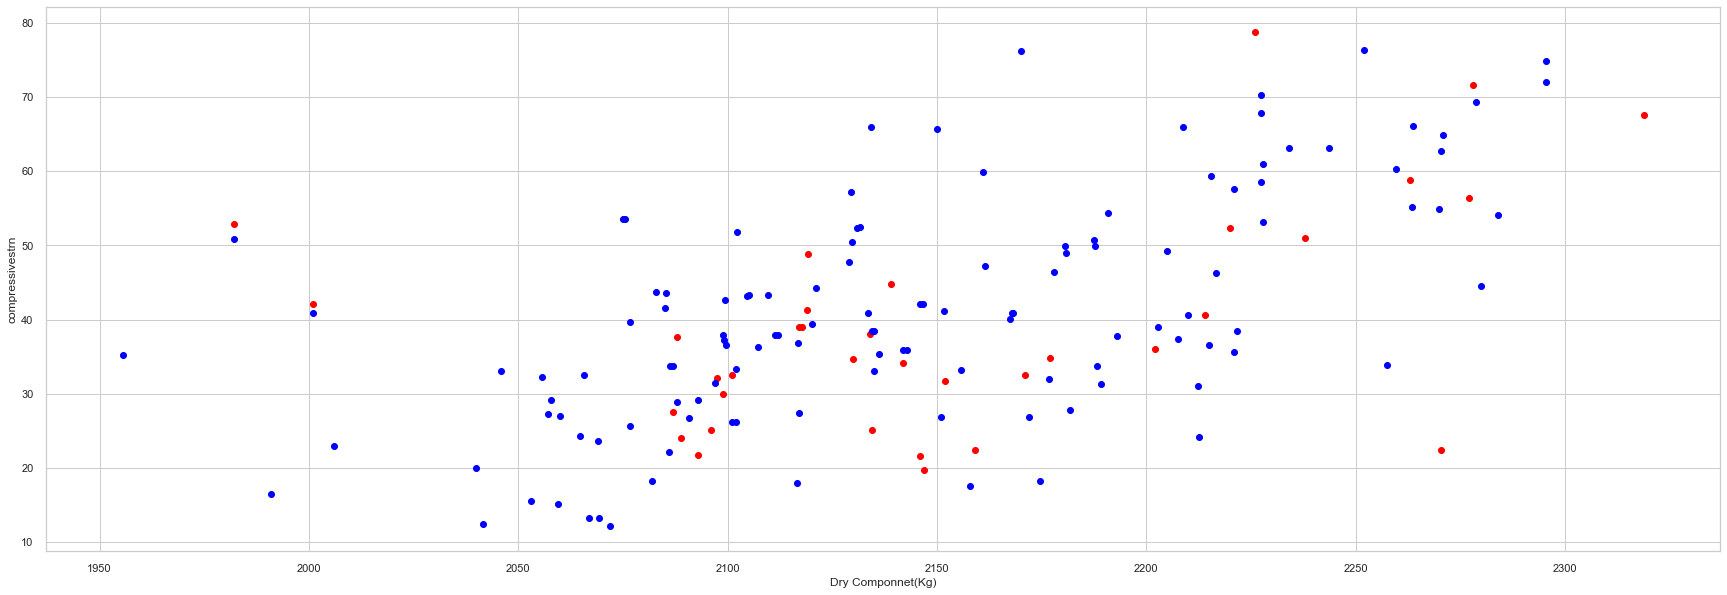

In [20]:
groupby_add=dfadd[dfadd.Age>=28].groupby('cemagg').mean()
x_values_add = groupby_add.index
y_values_add = groupby_add['compressivestrn']

groupby_zeroadd=dfaddzero[dfaddzero.Age>=28].groupby('cemagg').mean()
x_values_zeroadd = groupby_zeroadd.index
y_values_zeroadd = groupby_zeroadd['compressivestrn']

plt.figure(figsize=(30,10))
#plt.plot(x_values_zeroadd, y_values_zeroadd,"red")
plt.scatter(x_values_zeroadd, y_values_zeroadd,color="red")
#plt.plot(x_values_add, y_values_add)
plt.scatter(x_values_add, y_values_add,color="blue")
plt.xlabel("Dry Componnet(Kg)")
plt.ylabel("compressivestrn")
plt.show()

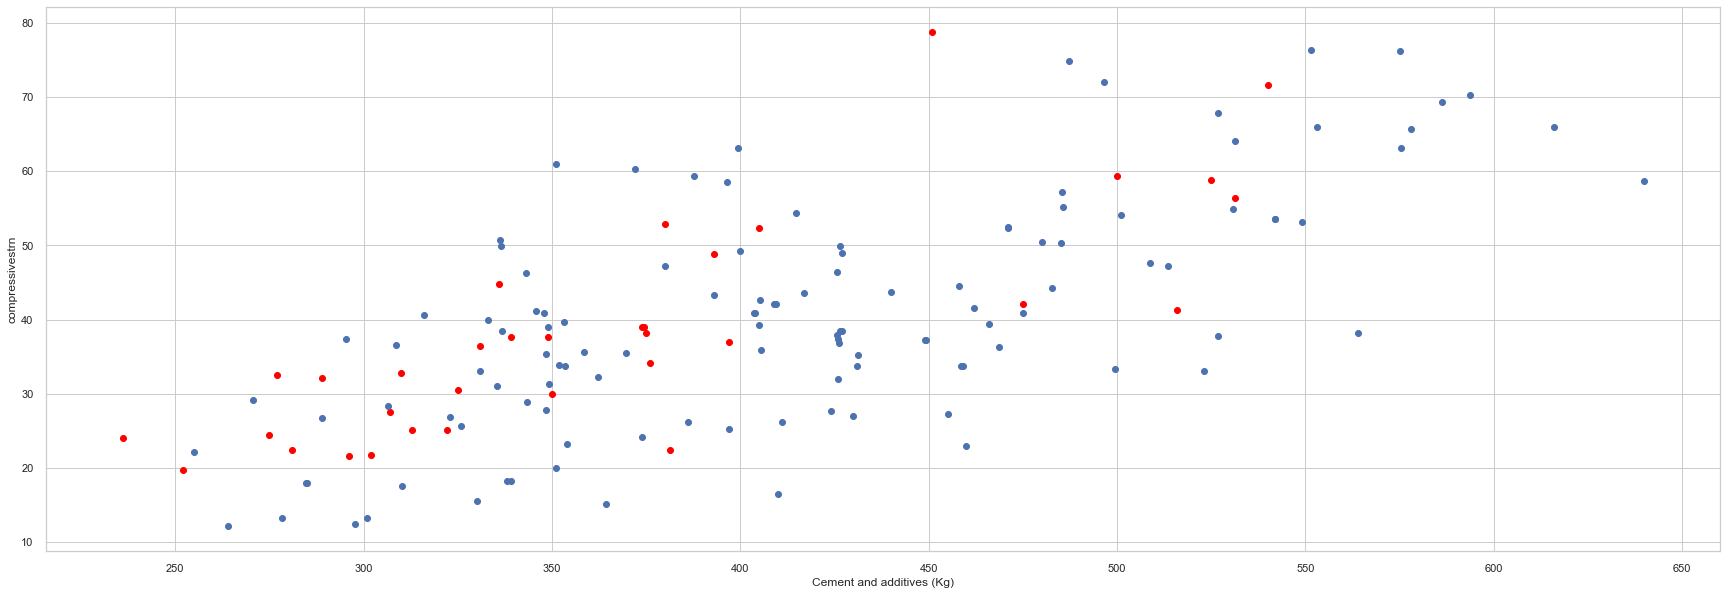

In [21]:
groupby_add=dfadd[dfadd.Age>=28].groupby('Total Cement').mean()
x_values_add = groupby_add.index
y_values_add = groupby_add['compressivestrn']

groupby_zeroadd=dfaddzero[dfaddzero.Age>=28].groupby('Total Cement').mean()
x_values_zeroadd = groupby_zeroadd.index
y_values_zeroadd = groupby_zeroadd['compressivestrn']

plt.figure(figsize=(30,10))
plt.scatter(x_values_zeroadd, y_values_zeroadd,color="red")
plt.scatter(x_values_add, y_values_add)
plt.xlabel("Cement and additives (Kg)")
plt.ylabel("compressivestrn")
plt.show()

C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


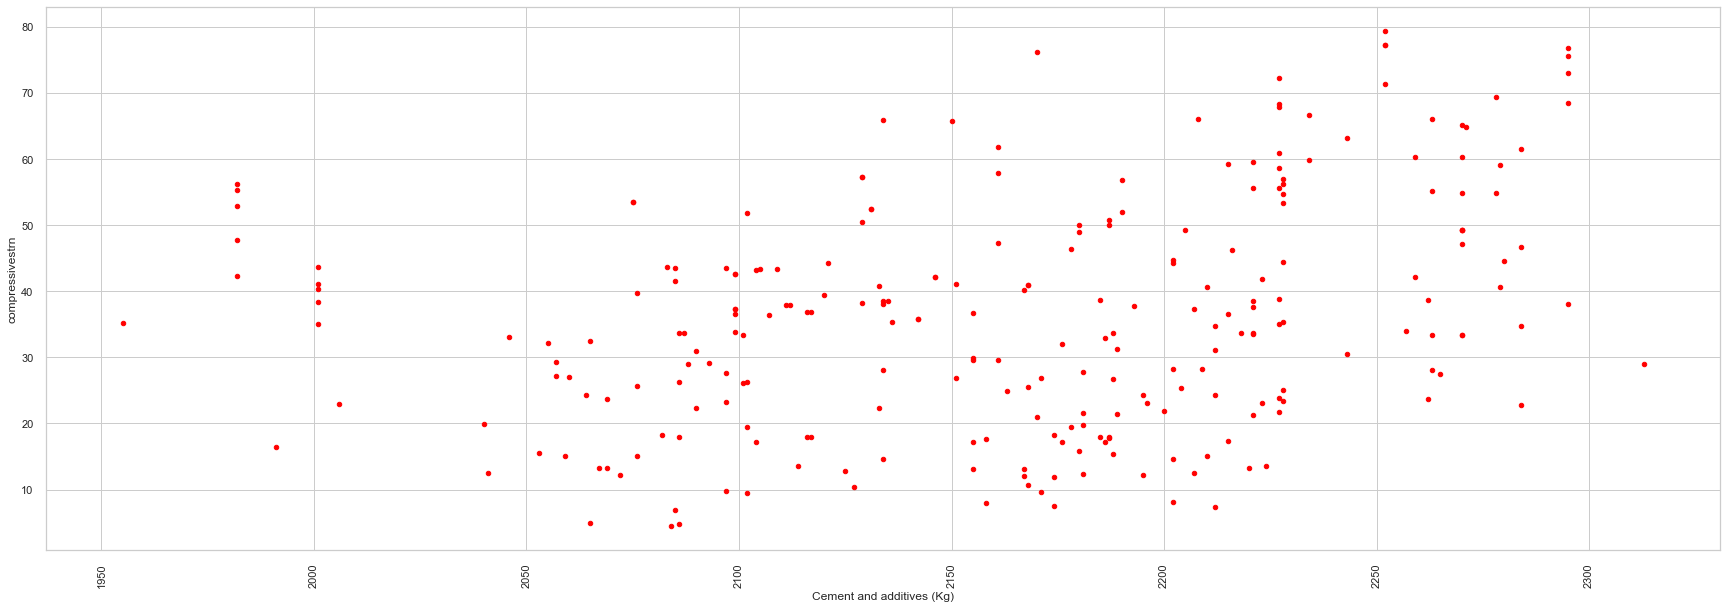

C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


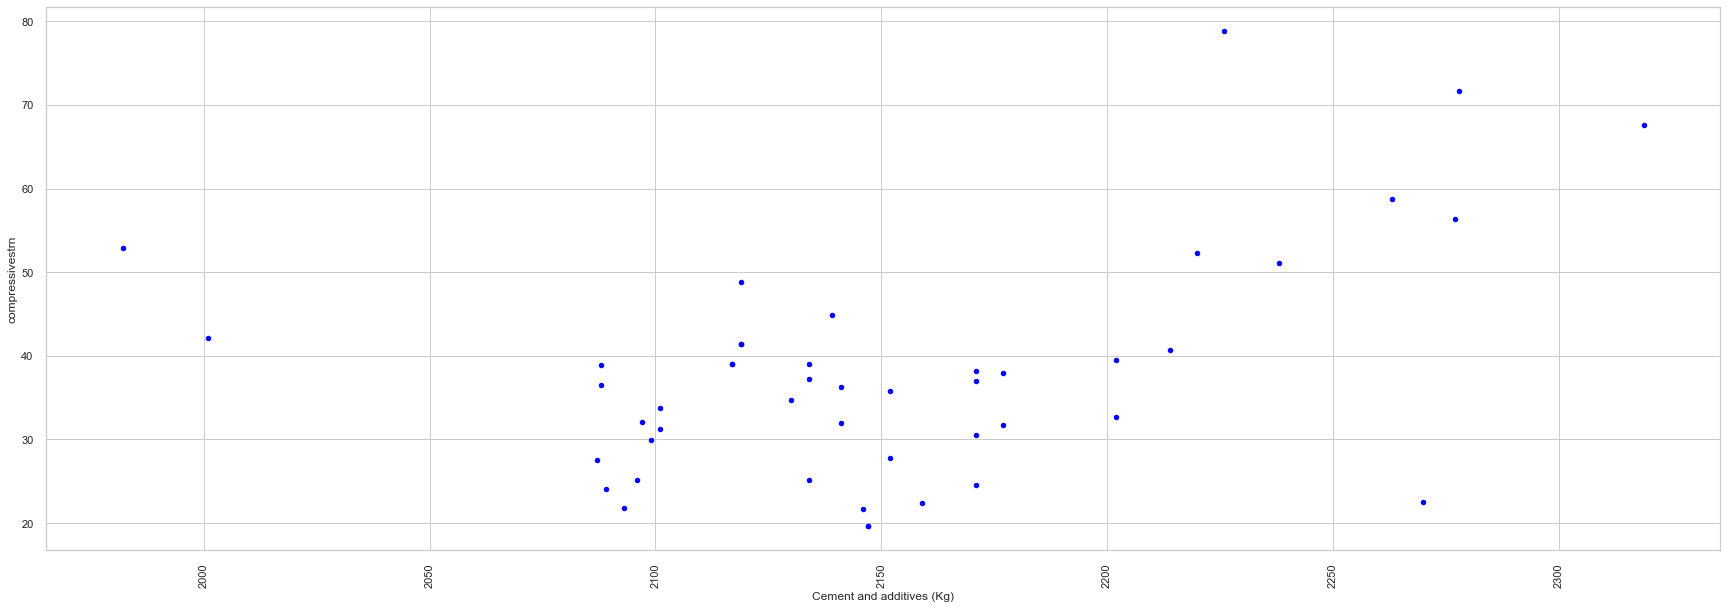

In [22]:

dfadd['Rndcemagg'] = dfadd['cemagg'].astype(int)
subset_df = dfadd[['Rndcemagg', 'compressivestrn']]
subset_df.plot(kind='scatter', x='Rndcemagg', y='compressivestrn', figsize=(30,10), color="red")

plt.xlabel("Cement and additives (Kg)")
plt.xticks(rotation=90)
plt.show()

dfaddzero['Rndcemagg']=dfaddzero[dfaddzero.Age>=28]['cemagg'].astype(int)
dfaddzero.dropna(inplace=True)# Only desired columns (you can add more)
subset_dfz = dfaddzero[['Rndcemagg', 'compressivestrn']]
subset_dfz = subset_dfz.sort_values(by='Rndcemagg')

subset_dfz.plot(kind='scatter', x='Rndcemagg', y='compressivestrn', figsize=(30,10),color="blue")
plt.xlabel("Cement and additives (Kg)")
plt.ylabel("compressivestrn")
plt.xticks(rotation=90)
plt.show()

C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


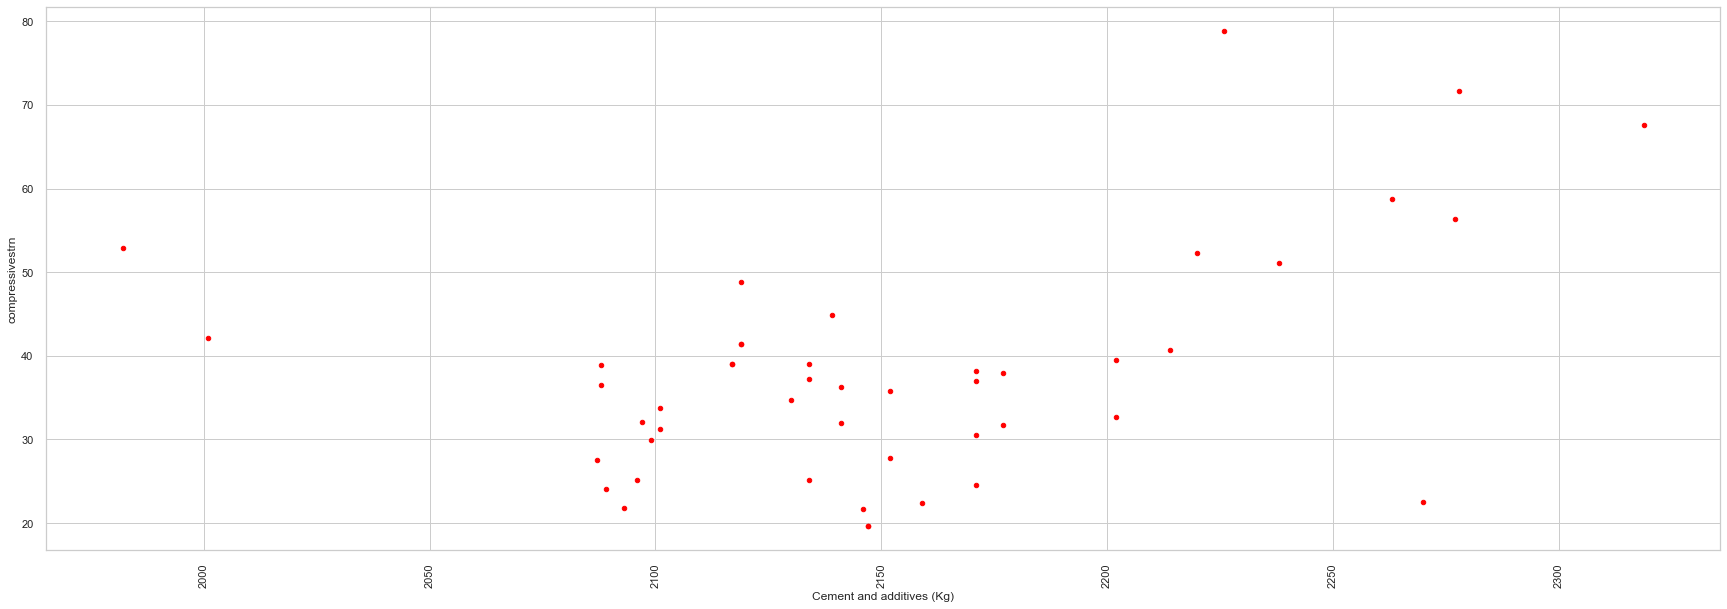

In [23]:
dfaddzero['Rndcemagg']=dfaddzero[dfaddzero.Age>=28]['cemagg'].astype(int)
dfaddzero.dropna(inplace=True)
subset_dfz = dfaddzero[['Rndcemagg', 'compressivestrn']]
subset_dfz = subset_dfz.sort_values(by='Rndcemagg')

# Plotting code
subset_dfz.plot(kind='scatter', x='Rndcemagg', y='compressivestrn', figsize=(30,10),color="red")
plt.xlabel("Cement and additives (Kg)")
plt.xticks(rotation=90)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
dfadd['Rndcemagg']=dfadd[dfadd.Age>=28]['cemagg'].astype(int)
dfadd.dropna(inplace=True)# Only desired columns (you can add more)
subset_df = dfadd[dfadd.Age>=28][['Rndcemagg', 'compressivestrn','Age']]


C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfadd[dfadd.Age>=28]['Rndcemagg'].values.reshape(-1, 1),
                                                    dfadd[dfadd.Age>=28]['compressivestrn'].values.reshape(-1, 1), test_size=0.2, 
                                                    random_state=0)

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [28]:
print(regressor.intercept_)
print(regressor.coef_)

[-190.95443079]
[[0.10887399]]


In [29]:
y_pred = regressor.predict(X_test)

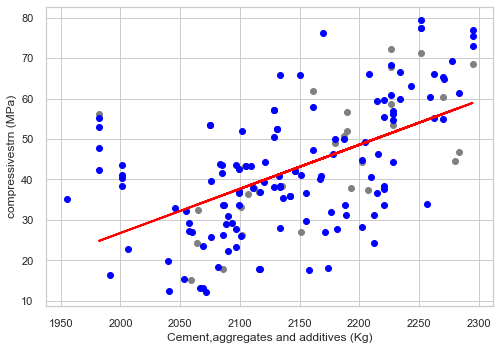

In [30]:
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Cement,aggregates and additives (Kg)")
plt.ylabel("compressivestrn (MPa)")
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.74830514331277
Mean Squared Error: 148.789116501459
Root Mean Squared Error: 12.197914432453565


In [32]:
dfadd['Total Cement']=dfadd[dfadd.Age>=28]['Total Cement'].astype(int)
dfadd.dropna(inplace=True)# Only desired columns (you can add more)
subset_df = dfadd[dfadd.Age>=28][['Total Cement', 'compressivestrn','Age']]

C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Narim\anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total Cement  compressivestrn  Age
1             409        42.133878   28
4             459        33.715376   28
5             471        52.420860   28
6             316        40.568768  100
8             541        53.524711   28
..            ...              ...  ...
310           475        43.698299  365
315           640        55.551081   28
316           468        36.349864   28
321           380        55.260122  365
325           475        38.407950  270

[162 rows x 3 columns]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dfadd[dfadd.Age>=28]['Total Cement'].values.reshape(-1, 1),
                                                    dfadd[dfadd.Age>=28]['compressivestrn'].values.reshape(-1, 1), test_size=0.2, 
                                                    random_state=0)

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression()

In [35]:
print(regressor.intercept_)
print(regressor.coef_)

[-10.56281193]
[[0.12377494]]


In [36]:
y_pred = regressor.predict(X_test)

In [37]:
df2=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

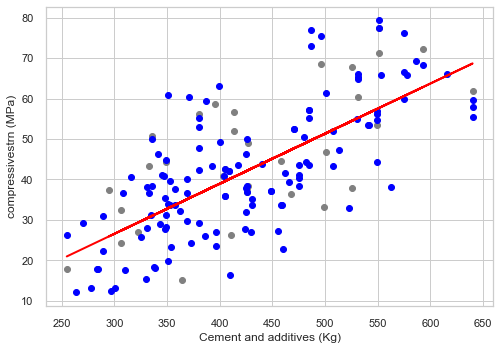

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Cement and additives (Kg)")
plt.ylabel("compressivestrn (MPa)")
plt.show()

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.188376471797845
Mean Squared Error: 143.07251381973768
Root Mean Squared Error: 11.961292313949095
